In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
df = pd.read_csv('/content/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [3]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [4]:
duplicate_rows = df[df.duplicated()]
number_of_duplicates = len(duplicate_rows)
print(number_of_duplicates)

0


In [5]:
df.drop(columns=['CustomerID'], inplace=True)

In [6]:
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40
...,...,...,...,...
195,Female,35,120,79
196,Female,45,126,28
197,Male,32,126,74
198,Male,32,137,18


In [7]:
#binary encoding for genre column
df['Genre'] = df['Genre'].map({'Female': 0, 'Male': 1})
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


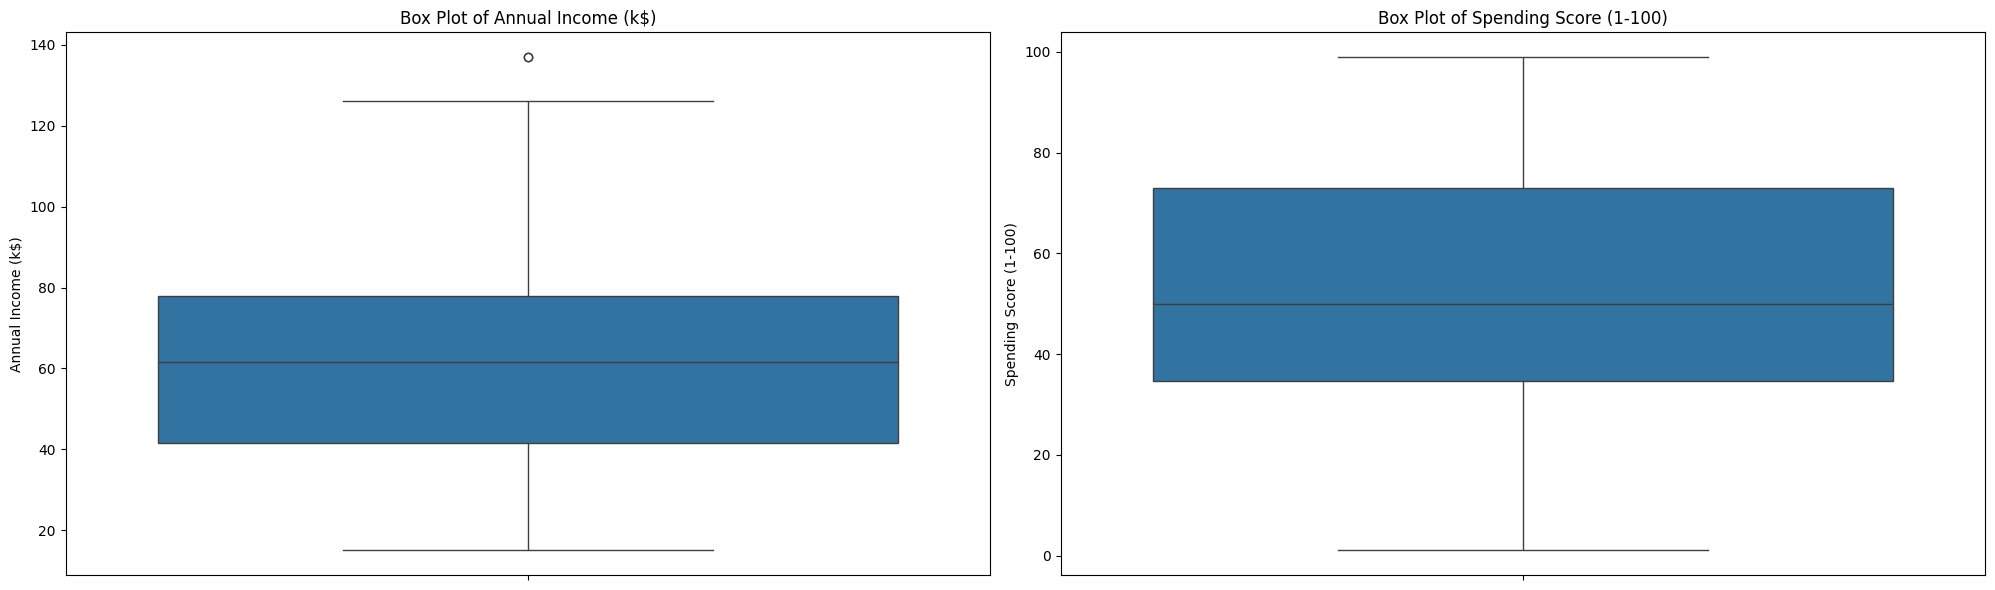

In [8]:
columns = ['Annual Income (k$)', 'Spending Score (1-100)']
plt.figure(figsize=(30, 6))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(df[col])
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [9]:
for col in columns:
        if col in df.columns:
            # Calculate IQR for the column
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            print(Q1,Q3)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            print(lower_bound,upper_bound)

            # Mark outliers
            df[col + '_outlier'] = df[col].apply(lambda x: x < lower_bound or x > upper_bound)

            # Count and print the number of outliers
            print(f"Number of outliers in {col}: {df[col + '_outlier'].sum()}")




41.5 78.0
-13.25 132.75
Number of outliers in Annual Income (k$): 2
34.75 73.0
-22.625 130.375
Number of outliers in Spending Score (1-100): 0


In [10]:
#remove outliers in annual income column
df = df[df['Annual Income (k$)'] < 130]
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Annual Income (k$)_outlier,Spending Score (1-100)_outlier
0,1,19,15,39,False,False
1,1,21,15,81,False,False
2,0,20,16,6,False,False
3,0,23,16,77,False,False
4,0,31,17,40,False,False
...,...,...,...,...,...,...
193,0,38,113,91,False,False
194,0,47,120,16,False,False
195,0,35,120,79,False,False
196,0,45,126,28,False,False


In [11]:
df=df.drop(columns=['Annual Income (k$)_outlier','Spending Score (1-100)_outlier'])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
193,0,38,113,91
194,0,47,120,16
195,0,35,120,79
196,0,45,126,28


In [12]:
#skewness of data
df.skew()

,0
Genre,0.266947
Age,0.470287
Annual Income (k$),0.174267
Spending Score (1-100),-0.048346


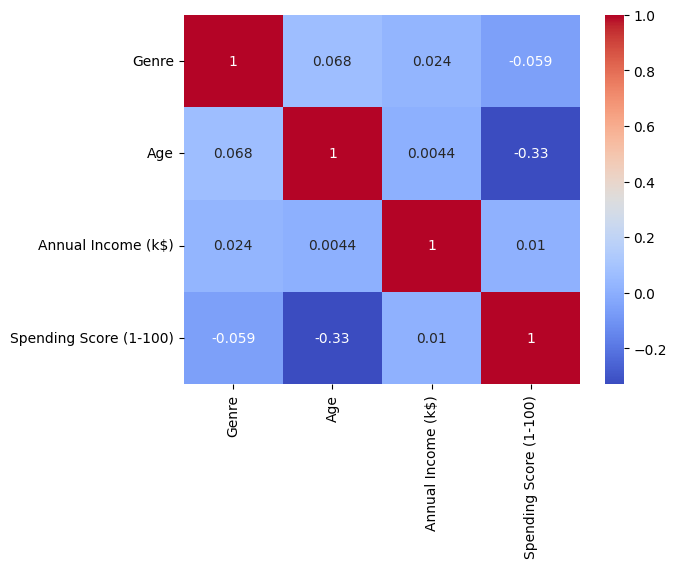

In [13]:
columns=df[['Genre','Age','Annual Income (k$)','Spending Score (1-100)']].corr(method='pearson')
sns.heatmap(columns,annot=True,cmap='coolwarm')
plt.show()

In [14]:
#standarize data
from sklearn.preprocessing import StandardScaler
columns_to_scale = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
scaler = StandardScaler()
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,-1.425414,-1.779171,-0.435989
1,1,-1.282367,-1.779171,1.199413
2,0,-1.353890,-1.739447,-1.720949
3,0,-1.139319,-1.739447,1.043661
4,0,-0.567131,-1.699723,-0.397051
...,...,...,...,...
193,0,-0.066466,2.113819,1.588795
194,0,0.577246,2.391890,-1.331567
195,0,-0.281037,2.391890,1.121537
196,0,0.434198,2.630236,-0.864309


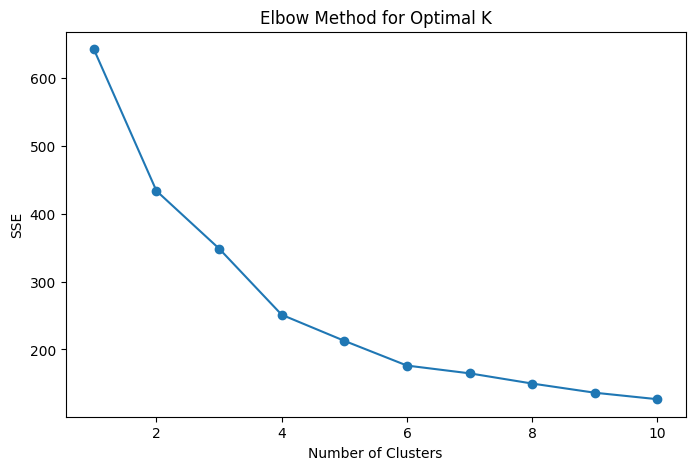

[642.6464646464648, 433.77984020450515, 348.7009575726319, 251.12066507316686, 212.70892837972693, 176.2328058673651, 164.77539251118742, 149.698430954097, 136.1836241284007, 126.6081730975291]


In [15]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)

# Plot the Elbow graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), sse, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()
print(sse)

In [16]:
optimal_clusters = 6 # You can update this based on the elbow point

# K-means clustering with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', random_state=42)
labels = kmeans.fit_predict(df)
centroids = kmeans.cluster_centers_
print(labels)
print(centroids)

[2 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5 2 5
 2 5 2 0 2 5 4 5 2 0 4 4 4 0 4 4 0 0 0 0 0 4 0 0 4 0 0 0 4 0 0 4 4 0 0 0 0
 0 4 0 4 4 0 0 4 0 0 4 0 0 4 4 0 0 4 0 4 4 4 0 4 0 4 4 0 0 4 0 4 0 0 0 0 0
 4 4 4 4 4 0 0 0 0 4 4 4 1 4 1 3 1 3 1 3 1 4 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1]
[[ 0.42222222  1.24479858 -0.21932681 -0.04401192]
 [ 0.44736842 -0.44102381  1.0098993   1.24245028]
 [ 0.43478261 -0.99627234 -1.37156457  1.06736221]
 [ 0.57575758  0.18711714  1.08218883 -1.30324847]
 [ 0.34210526 -0.85322526 -0.12433672 -0.04148436]
 [ 0.38095238  0.47166317 -1.33085323 -1.19991906]]


In [17]:
df['Cluster'] = labels
df

,Genre,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,-1.425414,-1.779171,-0.435989,2
1,1,-1.282367,-1.779171,1.199413,2
2,0,-1.353890,-1.739447,-1.720949,5
3,0,-1.139319,-1.739447,1.043661,2
4,0,-0.567131,-1.699723,-0.397051,5
...,...,...,...,...,...
193,0,-0.066466,2.113819,1.588795,1
194,0,0.577246,2.391890,-1.331567,3
195,0,-0.281037,2.391890,1.121537,1
196,0,0.434198,2.630236,-0.864309,3


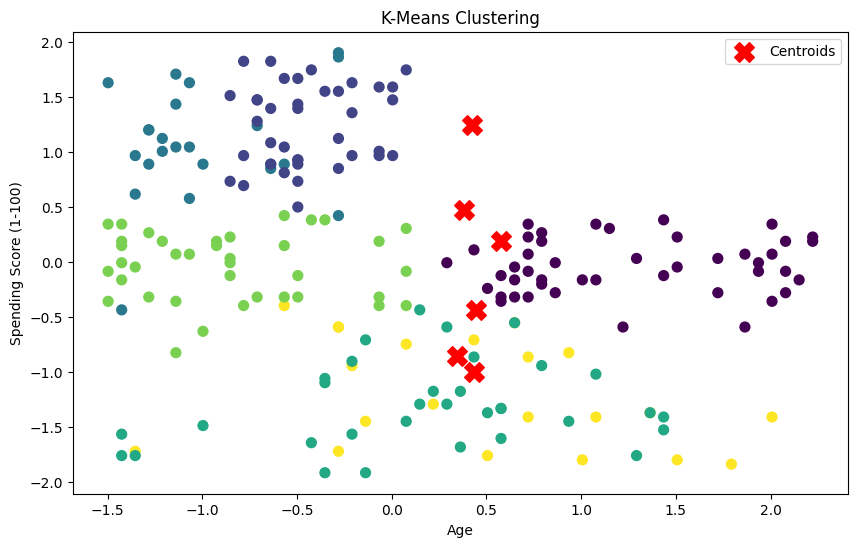

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=labels, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', label='Centroids', marker='X')
plt.title('K-Means Clustering')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [19]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df, labels)
print(f'Silhouette Score: {silhouette_avg}')

Silhouette Score: 0.524063579643529


In [20]:
#applying PCA
from sklearn.decomposition import PCA
# Apply PCA to the scaled data
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)

# Create a DataFrame with the PCA components and cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = df['Cluster']

# View the reduced dataset
print(df_pca)


         PCA1      PCA2  Cluster
0    0.470709 -0.814675        2
1   -0.036953 -1.785760        2
2    3.602440 -0.073761        5
3   -0.018500 -1.617038        2
4    3.050640 -0.356028        5
..        ...       ...      ...
193 -1.892161 -0.986781        1
194  0.637544  1.351931        3
195 -1.753728 -0.828776        1
196  0.493873  0.945867        3
197 -1.696715 -0.809410        1

[198 rows x 3 columns]


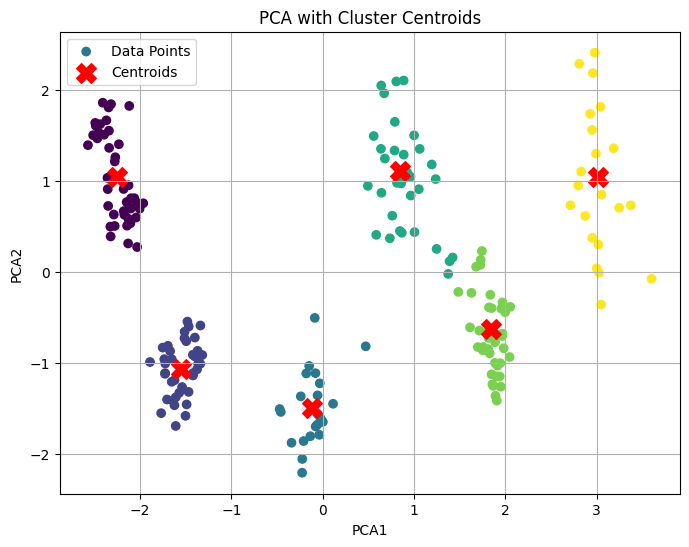

In [21]:
kmeans = KMeans(n_clusters=len(df['Cluster'].unique()))
kmeans.fit(df_pca[['PCA1', 'PCA2']])
centroids = kmeans.cluster_centers_

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PCA1'], df_pca['PCA2'], c=df['Cluster'], cmap='viridis', marker='o', label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.title('PCA with Cluster Centroids')
plt.legend()
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When 

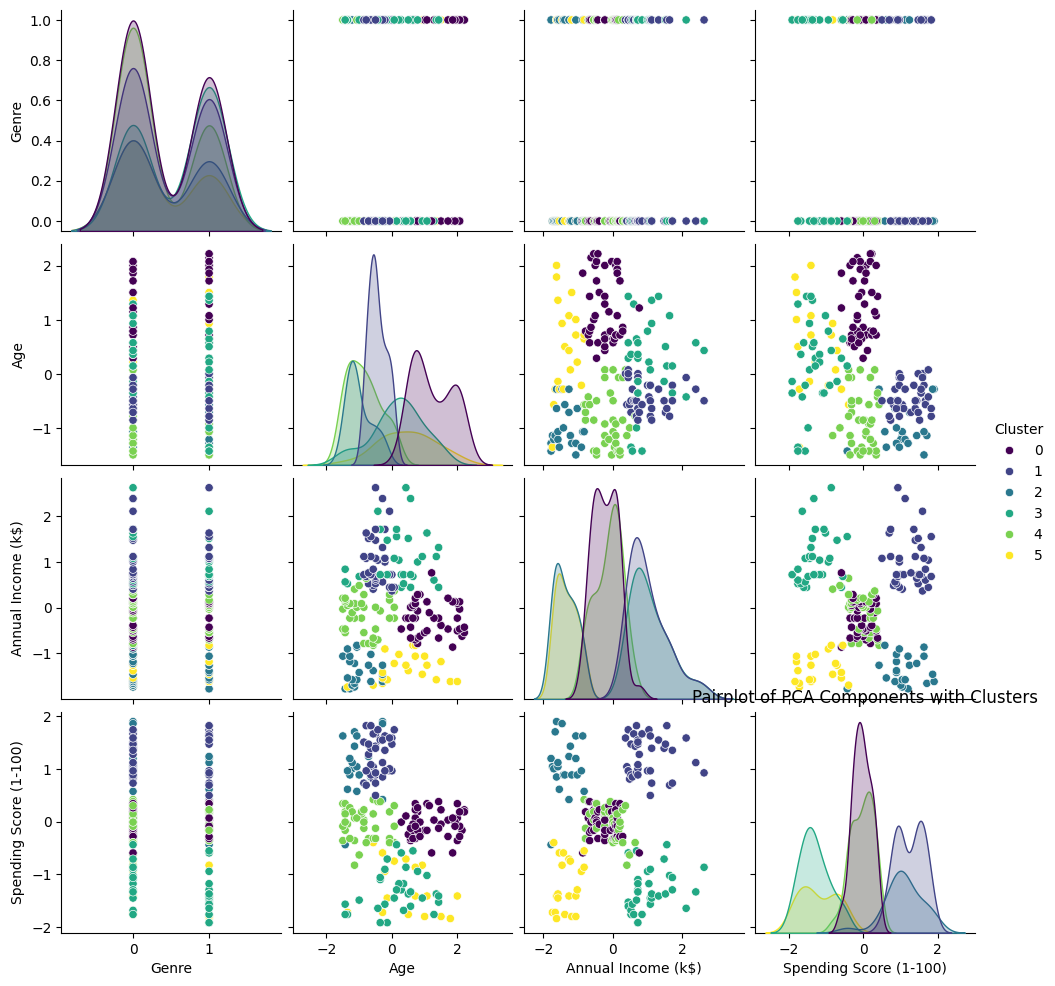

In [22]:
# Create a pairplot
sns.pairplot(df, hue='Cluster', palette='viridis')
plt.title('Pairplot of PCA Components with Clusters')
plt.show()


         PCA1      PCA2      PCA3  Cluster
0    0.470709 -0.814675 -1.429886        2
1   -0.036953 -1.785760 -1.689470        2
2    3.602440 -0.073761 -1.007966        5
3   -0.018500 -1.617038 -1.664589        2
4    3.050640 -0.356028 -1.295358        5
..        ...       ...       ...      ...
193 -1.892161 -0.986781  1.741392        1
194  0.637544  1.351931  2.468189        3
195 -1.753728 -0.828776  2.115712        1
196  0.493873  0.945867  2.657345        3
197 -1.696715 -0.809410  2.423676        1

[198 rows x 4 columns]


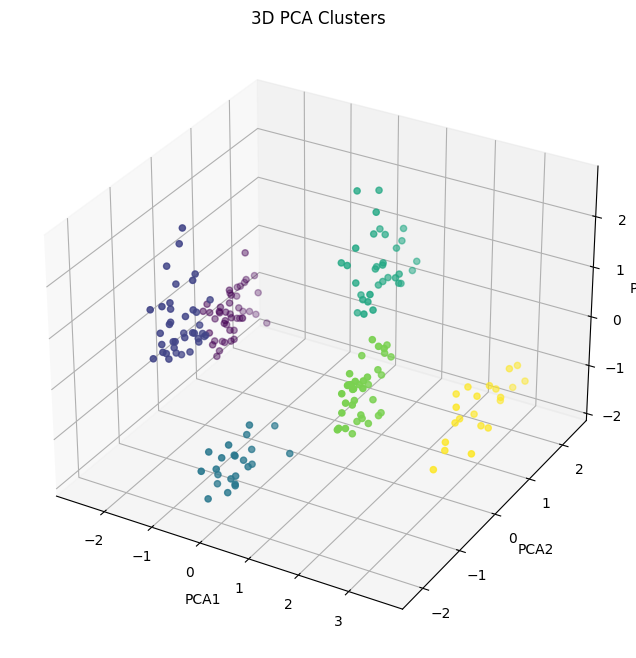

In [23]:
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df)

# Create a DataFrame with the PCA components and cluster labels
df_pca = pd.DataFrame(df_pca, columns=['PCA1', 'PCA2','PCA3'])
df_pca['Cluster'] = df['Cluster']

# View the reduced dataset
print(df_pca)

# Create a 3D scatter plot if you have a third PCA component
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_pca['PCA1'], df_pca['PCA2'], df_pca['PCA3'], c=df['Cluster'], cmap='viridis', marker='o')

# Label the axes
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
plt.title('3D PCA Clusters')
plt.show()


<ipython-input-24-b8d168935fa3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='PCA1', data=df_pca, palette='viridis')
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in

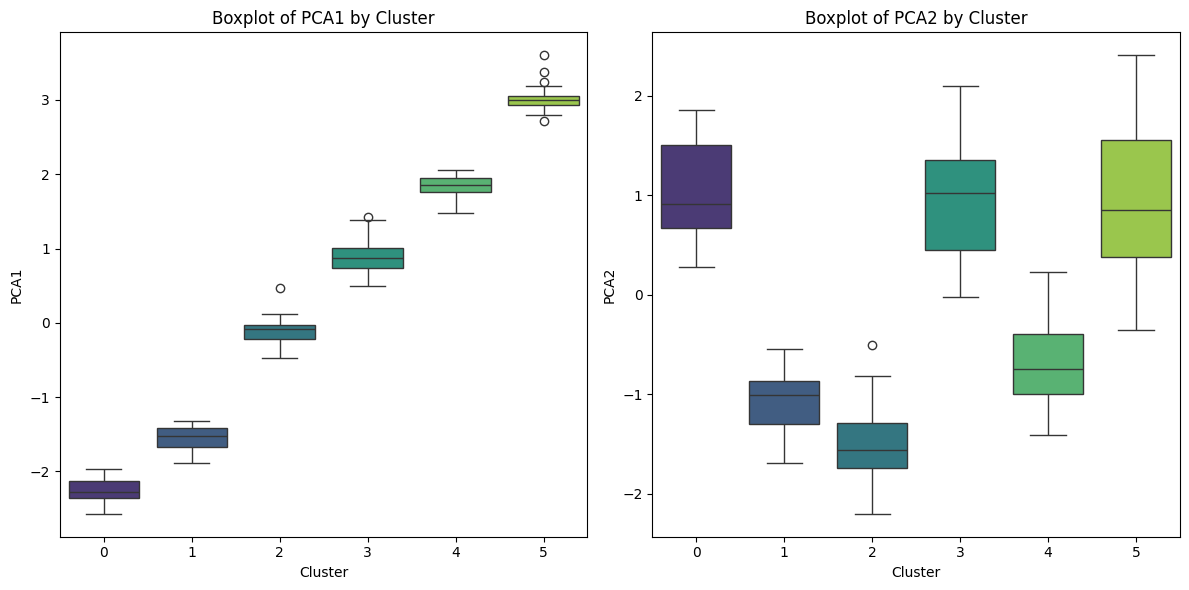

In [24]:
plt.figure(figsize=(12, 6))

# Boxplot for PCA1
plt.subplot(1, 2, 1)
sns.boxplot(x='Cluster', y='PCA1', data=df_pca, palette='viridis')
plt.title('Boxplot of PCA1 by Cluster')

# Boxplot for PCA2
plt.subplot(1, 2, 2)
sns.boxplot(x='Cluster', y='PCA2', data=df_pca, palette='viridis')
plt.title('Boxplot of PCA2 by Cluster')

plt.tight_layout()
plt.show()


<ipython-input-25-2aa20a42cb28>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='PCA1', data=df_pca, palette='viridis')
<ipython-input-25-2aa20a42cb28>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cluster', y='PCA2', data=df_pca, palette='viridis')


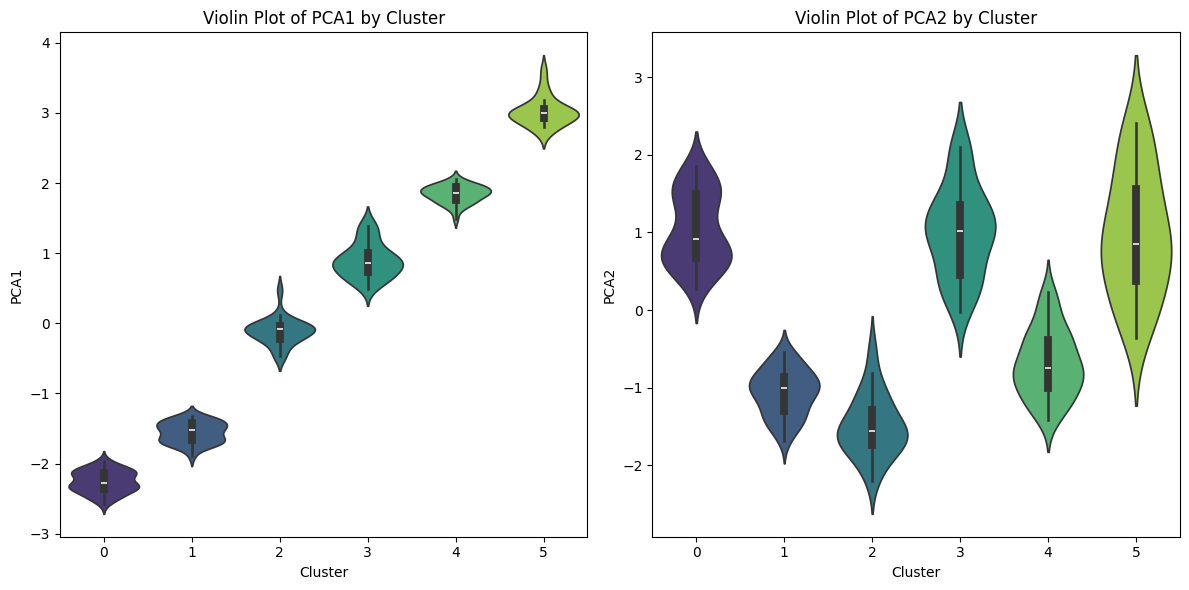

In [25]:
plt.figure(figsize=(12, 6))

# Violin plot for PCA1
plt.subplot(1, 2, 1)
sns.violinplot(x='Cluster', y='PCA1', data=df_pca, palette='viridis')
plt.title('Violin Plot of PCA1 by Cluster')

# Violin plot for PCA2
plt.subplot(1, 2, 2)
sns.violinplot(x='Cluster', y='PCA2', data=df_pca, palette='viridis')
plt.title('Violin Plot of PCA2 by Cluster')

plt.tight_layout()
plt.show()


In [26]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(df_pca[['PCA1', 'PCA2']], df['Cluster'])
print(f'Silhouette Score: {silhouette_avg:.2f}')


Silhouette Score: 0.66


# Hierarchical Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
